# CIFAR-10

CIFAR-10 dataset: http://www.cs.toronto.edu/~kriz/cifar.html

#### Cieľ zadania: Klasifikácia obrázku jednej z nasledujúcich tried:
• 0: airplane\
• 1: automobile\
• 2: bird\
• 3: cat\
• 4: deer\
• 5: dog\
• 6: frog\
• 7: horse\
• 8: ship\
• 9: truck

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import wandb
from wandb.keras import WandbCallback

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Add

In [2]:
def countValues(data):
    unique_vals, counts = np.unique(data, return_counts=True)

    for val, count in zip(unique_vals, counts):
        print("Class {}: {} records".format(val, count))

In [3]:
def dataNormalisation(data):
    return data.astype('float32') / 255.0

In [4]:
dataClass = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

In [5]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

print('Train dataset:\n X=%s\n y=%s\n' % (X_train.shape, y_train.shape))
print('Validation dataset:\n X=%s\n y=%s' % (X_val.shape, y_val.shape))

Train dataset:
 X=(50000, 32, 32, 3)
 y=(50000, 1)

Validation dataset:
 X=(10000, 32, 32, 3)
 y=(10000, 1)


In [6]:
countValues(y_train)

Class 0: 5000 records
Class 1: 5000 records
Class 2: 5000 records
Class 3: 5000 records
Class 4: 5000 records
Class 5: 5000 records
Class 6: 5000 records
Class 7: 5000 records
Class 8: 5000 records
Class 9: 5000 records


In [7]:
countValues(y_val)

Class 0: 1000 records
Class 1: 1000 records
Class 2: 1000 records
Class 3: 1000 records
Class 4: 1000 records
Class 5: 1000 records
Class 6: 1000 records
Class 7: 1000 records
Class 8: 1000 records
Class 9: 1000 records


Normalizacia dat do intervalu 0 - 1

In [8]:
X_train = dataNormalisation(X_train)
X_val = dataNormalisation(X_val)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=25)

In [9]:
countValues(y_val)

Class 0: 497 records
Class 1: 482 records
Class 2: 507 records
Class 3: 504 records
Class 4: 500 records
Class 5: 511 records
Class 6: 494 records
Class 7: 507 records
Class 8: 494 records
Class 9: 504 records


In [10]:
countValues(y_test)

Class 0: 503 records
Class 1: 518 records
Class 2: 493 records
Class 3: 496 records
Class 4: 500 records
Class 5: 489 records
Class 6: 506 records
Class 7: 493 records
Class 8: 506 records
Class 9: 496 records


### Dáta:
• RGB obrázky v rozmeroch 32x32x3\
• obrázky rozdelené do 10 tried

Trénovacích vzoriek: 50000 - každá trieda má 5000 vzoriek\
Validačných vzoriek: 10000 - každá trieda má 1000 vzoriek\
&emsp;&emsp;&emsp;    • validačný dataset - 5000 vzoriek\
&emsp;&emsp;&emsp;    • testovací dataset - 5000 vzoriek

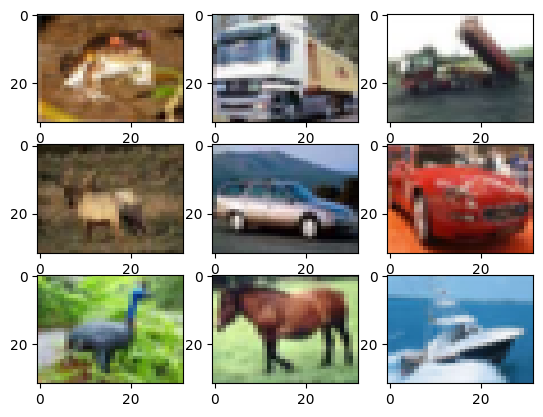

In [11]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i], aspect='auto')
plt.show()

In [12]:
print('Class:')
for i in range(9):
    print(y_train[i], '-', dataClass[y_train[i][0]])

Class:
[6] - frog
[9] - truck
[9] - truck
[4] - deer
[1] - automobile
[1] - automobile
[2] - bird
[7] - horse
[8] - ship


In [13]:
# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Pokus 1

In [15]:
# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus cislo 1"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 20

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

wandb: Currently logged in as: andrejbelak0 (neural-netwok-nn). Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


1561/1563 [============================>.] - ETA: 0s - loss: 1.3729 - accuracy: 0.5086

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155703-3izl78g6\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155703-3izl78g6\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155703-3izl78g6\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 35s 22ms/step - loss: 1.3730 - accuracy: 0.5084 - val_loss: 1.1422 - val_accuracy: 0.5994 - lr: 0.0010
157/157 - 1s - loss: 1.1164 - accuracy: 0.6078 - 742ms/epoch - 5ms/step
Validation accuracy: 0.6078000068664551
Validation loss: 1.116413950920105
157/157 [==============================] - 1s 5ms/step
Predictions: [6 5 1 ... 6 0 7]


In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus 2

In [27]:
# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 2"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 20


model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.5936
Validation loss,1.14422
accuracy,0.44692


1560/1563 [============================>.] - ETA: 0s - loss: 1.4638 - accuracy: 0.4737

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160852-a6fawflj\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160852-a6fawflj\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160852-a6fawflj\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 24s 15ms/step - loss: 1.4635 - accuracy: 0.4737 - val_loss: 1.2646 - val_accuracy: 0.5654 - lr: 0.0010
157/157 - 1s - loss: 1.2477 - accuracy: 0.5722 - 696ms/epoch - 4ms/step
Validation accuracy: 0.5722000002861023
Validation loss: 1.247680425643921
157/157 [==============================] - 1s 5ms/step
Predictions: [1 9 1 ... 9 0 7]


In [ ]:
model.summary()

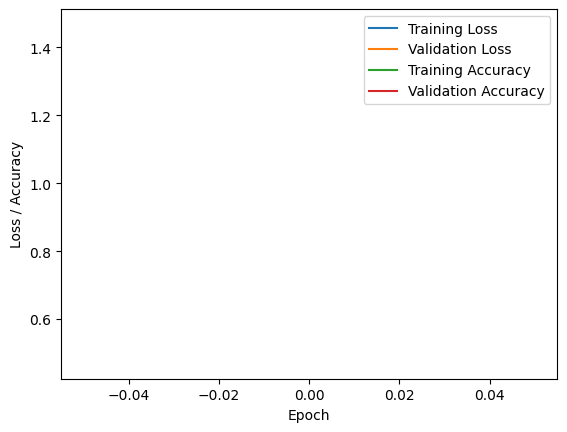

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus 3

In [16]:
# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 3"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 64
config.epochs = 20


model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), stride= (2,2) activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.6078
Validation loss,1.11641
accuracy,0.50844


1561/1563 [============================>.] - ETA: 0s - loss: 1.3895 - accuracy: 0.5035

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155741-g6a9xo9u\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155741-g6a9xo9u\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155741-g6a9xo9u\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 34s 21ms/step - loss: 1.3889 - accuracy: 0.5037 - val_loss: 1.1431 - val_accuracy: 0.5972 - lr: 0.0010
157/157 - 1s - loss: 1.1374 - accuracy: 0.5956 - 757ms/epoch - 5ms/step
Validation accuracy: 0.5956000089645386
Validation loss: 1.1373693943023682
157/157 [==============================] - 1s 5ms/step
Predictions: [9 5 9 ... 9 0 7]


In [ ]:
model.summary()

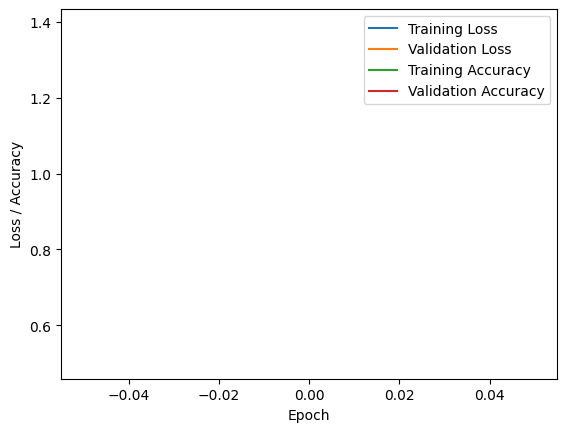

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus 4

In [18]:
# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 4"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 20

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.5956
Validation loss,1.13737
accuracy,0.50366


1561/1563 [============================>.] - ETA: 0s - loss: 1.3012 - accuracy: 0.5560

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155835-jsdc3r8p\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155835-jsdc3r8p\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155835-jsdc3r8p\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 49s 31ms/step - loss: 1.3010 - accuracy: 0.5560 - val_loss: 1.1305 - val_accuracy: 0.6154 - lr: 0.0010
157/157 - 1s - loss: 1.0780 - accuracy: 0.6314 - 1s/epoch - 7ms/step
Validation accuracy: 0.6313999891281128
Validation loss: 1.0779991149902344
157/157 [==============================] - 1s 7ms/step
Predictions: [1 5 1 ... 1 0 7]


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                      

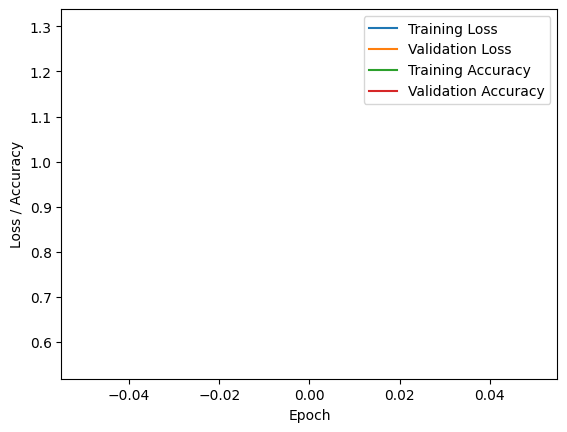

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus 5

In [21]:
# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 5"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 20


model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='LeakyReLU', input_shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='LeakyReLU'),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='LeakyReLU'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Conv2D(128, kernel_size=(5, 5), activation='LeakyReLU'),
    layers.Conv2D(128, kernel_size=(5, 5), strides=(2, 2), activation='LeakyReLU'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(256, activation='LeakyReLU'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='LeakyReLU'),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.6314
Validation loss,1.078
accuracy,0.556


1562/1563 [============================>.] - ETA: 0s - loss: 1.5614 - accuracy: 0.4581

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155944-nzy1edp8\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155944-nzy1edp8\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_155944-nzy1edp8\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 133s 84ms/step - loss: 1.5613 - accuracy: 0.4582 - val_loss: 1.1515 - val_accuracy: 0.5866 - lr: 0.0010
157/157 - 3s - loss: 1.1112 - accuracy: 0.5972 - 3s/epoch - 18ms/step
Validation accuracy: 0.5971999764442444
Validation loss: 1.1111541986465454
157/157 [==============================] - 3s 18ms/step
Predictions: [6 3 1 ... 6 0 7]


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 13, 13, 64)      

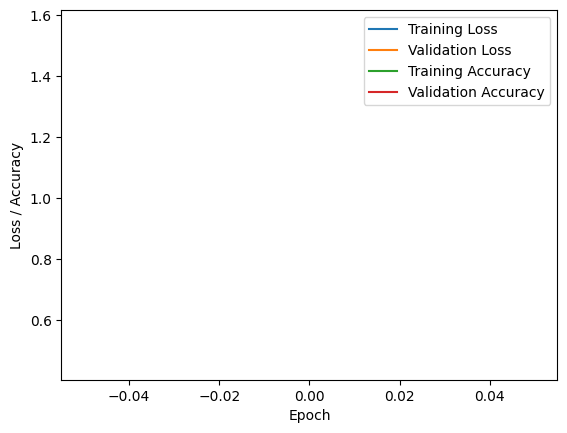

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus 6

In [24]:
# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 6"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 64
config.epochs = 20



def resnet_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, activation='LeakyReLU', padding='same')(input_data)
    x = layers.Conv2D(filters, conv_size, activation='LeakyReLU', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, input_data])
    x = layers.Activation('LeakyReLU')(x)
    return x

input_layer = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, kernel_size=(3, 3), activation='LeakyReLU')(input_layer)
x = layers.Conv2D(32, kernel_size=(3, 3), activation='LeakyReLU')(x)
x = layers.BatchNormalization()(x)

x = resnet_block(x, filters=32, conv_size=(3, 3))
x = resnet_block(x, filters=32, conv_size=(3, 3))

x = layers.Conv2D(64, kernel_size=(3, 3), activation='LeakyReLU')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

x = resnet_block(x, filters=64, conv_size=(5, 5))

x = layers.Conv2D(128, kernel_size=(5, 5), activation='LeakyReLU')(x)
x = layers.Conv2D(128, kernel_size=(5, 5), strides=(2, 2), activation='LeakyReLU')(x)
x = layers.BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation='LeakyReLU')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='LeakyReLU')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Validation loss': val_loss, 'Test accuracy': val_acc})


Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.5972
Validation loss,1.11115
accuracy,0.4582


1563/1563 [==============================] - ETA: 0s - loss: 1.5840 - accuracy: 0.4469

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160217-k3vspyyv\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160217-k3vspyyv\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160217-k3vspyyv\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 368s 234ms/step - loss: 1.5840 - accuracy: 0.4469 - val_loss: 1.1623 - val_accuracy: 0.5954 - lr: 0.0010
157/157 - 7s - loss: 1.1442 - accuracy: 0.5936 - 7s/epoch - 46ms/step
Validation accuracy: 0.5935999751091003
Validation loss: 1.1442221403121948
157/157 [==============================] - 7s 44ms/step
Predictions: [1 5 1 ... 3 0 7]


In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_11 (Conv2D)             (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 28, 28, 32)   9248        ['conv2d_11[0][0]']              
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 28, 28, 32)  128         ['conv2d_12[0][0]']              
 rmalization)                                                                                 

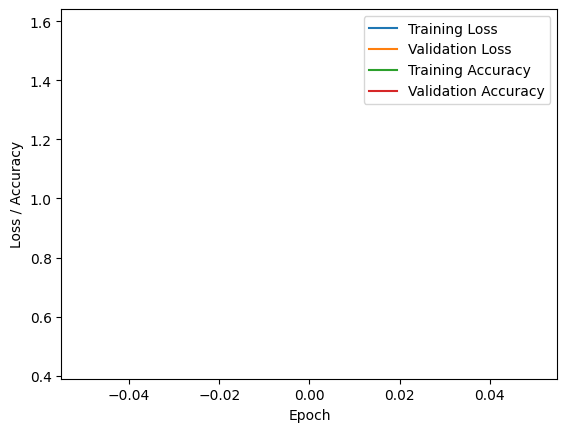

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus cislo 7

In [29]:
# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 7"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 20

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.5722
Validation loss,1.24768
accuracy,0.47372


1562/1563 [============================>.] - ETA: 0s - loss: 1.8923 - accuracy: 0.3118

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160926-501b6d7n\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160926-501b6d7n\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_160926-501b6d7n\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 44s 28ms/step - loss: 1.8923 - accuracy: 0.3118 - val_loss: 1.6382 - val_accuracy: 0.3950 - lr: 0.0010
157/157 - 1s - loss: 1.6381 - accuracy: 0.3952 - 1s/epoch - 7ms/step
Validation accuracy: 0.3952000141143799
Validation loss: 1.6380589008331299
157/157 [==============================] - 1s 7ms/step
Predictions: [6 3 8 ... 6 8 7]


In [ ]:
model.summary()

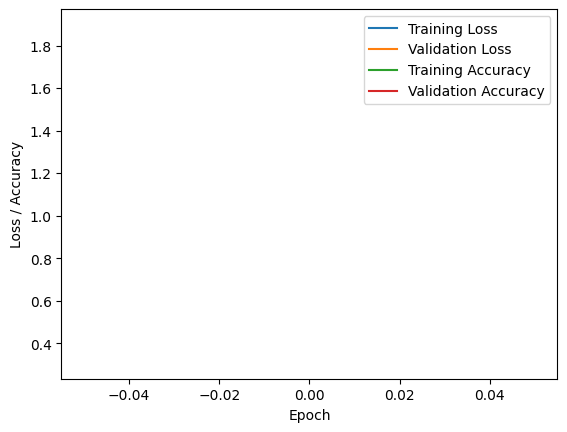

In [30]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus cislo 8

In [31]:
import tensorflow as tf


# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 8"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 20

# Define the residual block
def residual_block(inputs, filters, stride=1):
    shortcut = inputs

    # First convolutional layer with 3x3 filters and ReLU activation
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=stride, padding='same', activation='relu')(inputs)
    # Batch normalization layer
    x = tf.keras.layers.BatchNormalization()(x)
    # Second convolutional layer with 3x3 filters and ReLU activation
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(x)
    # Batch normalization layer
    x = tf.keras.layers.BatchNormalization()(x)

    # Add the shortcut to the residual block output and apply ReLU activation
    if shortcut.shape[-1] != filters or stride != 1:
        shortcut = tf.keras.layers.Conv2D(filters=filters, kernel_size=(1, 1), strides=stride, padding='valid', activation='relu')(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)

    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x


# Define the model architecture with residual blocks
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = residual_block(x, filters=64)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = residual_block(x, filters=128)

x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = residual_block(x, filters=256)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})
                                                 
                                                 

Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.3952
Validation loss,1.63806
accuracy,0.3118


1563/1563 [==============================] - ETA: 0s - loss: 1.1582 - accuracy: 0.5905

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_161022-ji74ljjp\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_161022-ji74ljjp\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_161022-ji74ljjp\files\model-best)... Done. 0.1s


1563/1563 [==============================] - 251s 159ms/step - loss: 1.1582 - accuracy: 0.5905 - val_loss: 0.9547 - val_accuracy: 0.6728 - lr: 0.0010
157/157 - 6s - loss: 0.9187 - accuracy: 0.6792 - 6s/epoch - 38ms/step
Validation accuracy: 0.6791999936103821
Validation loss: 0.9186722636222839
157/157 [==============================] - 6s 37ms/step
Predictions: [1 7 1 ... 3 0 7]


In [ ]:
model.summary()

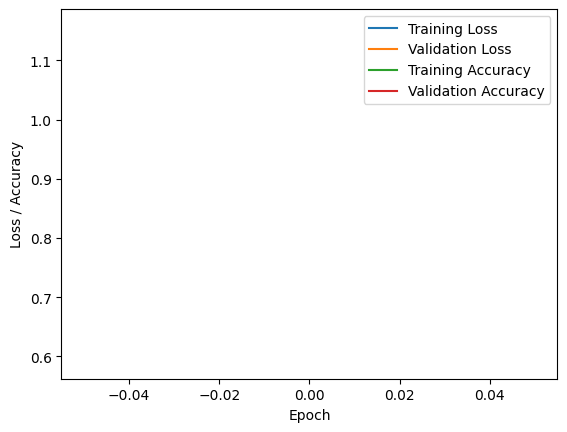

In [32]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

  # pokus cislo 9

In [33]:
import tensorflow as tf


# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 9"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 64
config.epochs = 20

# Define the model architecture
model = tf.keras.Sequential()

# Add convolutional layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

# Add dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.6792
Validation loss,0.91867
accuracy,0.59052


1563/1563 [==============================] - ETA: 0s - loss: 1.5382 - accuracy: 0.4682

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_161454-fgx1fn7n\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_161454-fgx1fn7n\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_161454-fgx1fn7n\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 150s 94ms/step - loss: 1.5382 - accuracy: 0.4682 - val_loss: 1.2310 - val_accuracy: 0.5670 - lr: 0.0010
157/157 - 4s - loss: 1.2016 - accuracy: 0.5714 - 4s/epoch - 24ms/step
Validation accuracy: 0.571399986743927
Validation loss: 1.2016340494155884
157/157 [==============================] - 4s 23ms/step
Predictions: [6 3 9 ... 3 8 7]


In [ ]:
model.summary()

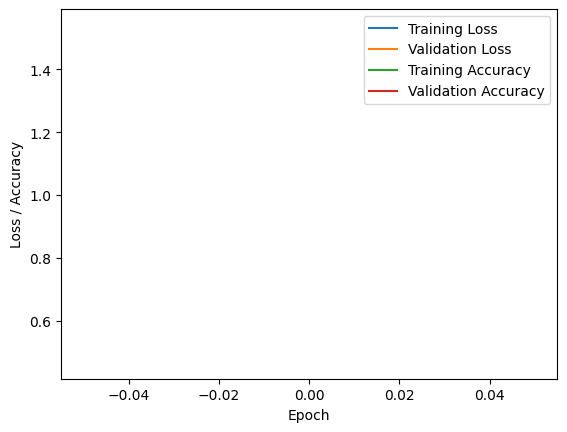

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus cislo 10

In [35]:
import tensorflow as tf

# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 10"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 64
config.epochs = 20

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=7, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=7, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=7, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=7, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})


Validation accuracy,▁
Validation loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Validation accuracy,0.5714
Validation loss,1.20163
accuracy,0.4682


 474/1563 [========>.....................] - ETA: 5:52 - loss: 2.2506 - accuracy: 0.2007

KeyboardInterrupt: 

In [ ]:
model.summary()

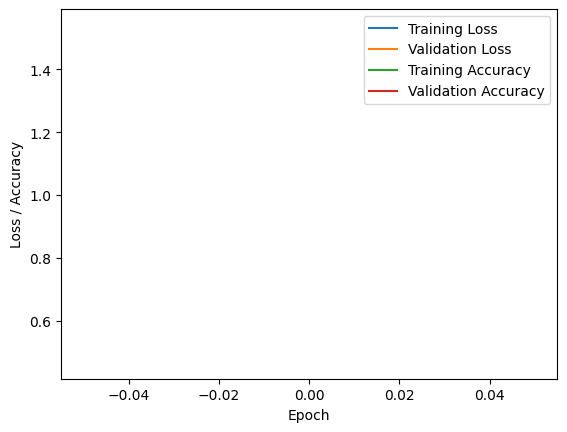

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus cislo 11

In [ ]:
import tensorflow as tf

# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 11"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 32
config.epochs = 20

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

In [ ]:
model.summary()

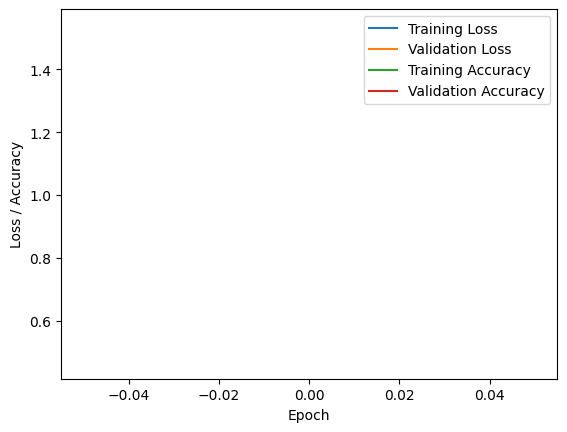

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Pokus 12

In [43]:
import tensorflow as tf

# Define the model architecture
wandb.init(project="neural-network-assgiment2")
wandb.run.name = "Pokus 12"
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 64
config.epochs = 20

# Define the model architecture
model = tf.keras.models.Sequential([
    # First Convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), strides=(2,2), activation='relu', input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Second Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    # Third Convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), strides=(2,2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Flatten the output from the convolutional layers
    tf.keras.layers.Flatten(),

    # Dense layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    # Output layer
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.000001)

history = model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop,WandbCallback()])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', val_acc)
print('Test loss:', val_loss)

# Evaluate the model on the val set and log the results
wandb.log({'Test loss': val_loss, 'Test accuracy': val_acc})

Test accuracy,▁
Test loss,▁
accuracy,▁
epoch,▁
loss,▁
lr,▁
val_accuracy,▁
val_loss,▁
Test accuracy,0.4232
Test loss,1.5914
accuracy,0.3459


1562/1563 [============================>.] - ETA: 0s - loss: 1.7972 - accuracy: 0.3473

INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_163313-3k8uovgv\files\model-best\assets


INFO:tensorflow:Assets written to: D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_163313-3k8uovgv\files\model-best\assets
wandb: Adding directory to artifact (D:\10.semester\NN\neural-networks\2.zadanie\src\wandb\run-20230410_163313-3k8uovgv\files\model-best)... Done. 0.0s


1563/1563 [==============================] - 49s 30ms/step - loss: 1.7973 - accuracy: 0.3472 - val_loss: 1.4155 - val_accuracy: 0.4852 - lr: 0.0010
157/157 - 1s - loss: 1.3850 - accuracy: 0.4898 - 1s/epoch - 8ms/step
Test accuracy: 0.48980000615119934
Test loss: 1.3850477933883667
157/157 [==============================] - 1s 8ms/step
Predictions: [9 3 6 ... 6 0 7]


In [ ]:
model.summary()

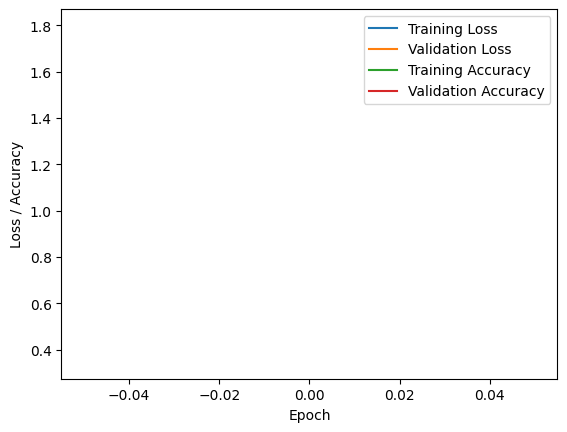

In [44]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

#### Augmentovany a normalizovany dataset

In [45]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

X_train = dataNormalisation(X_train)
X_val = dataNormalisation(X_val)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=25)

Augmentacia dat, zvysenie poctu obrazkov o dvojnasobok

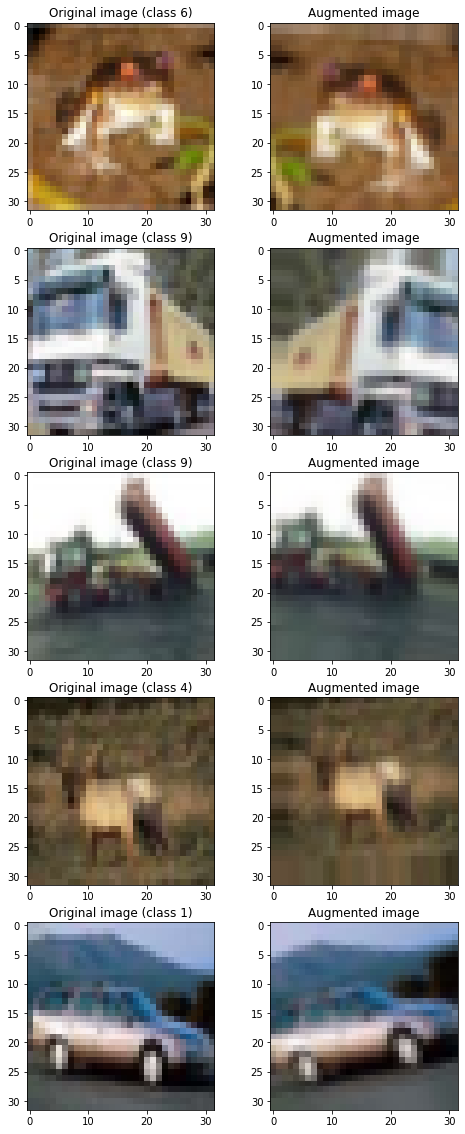

In [152]:
# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1)

# Generate augmented images and labels
augmented_images = []
augmented_labels = []
for i in range(X_train.shape[0]):
    # Generate augmented image
    augmented_image = datagen.random_transform(X_train[i])
    # Append augmented image to list of augmented images
    augmented_images.append(augmented_image)
    # Append corresponding label to list of augmented labels
    augmented_labels.append(y_train[i])

# Convert the list of augmented images and labels to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate original images and labels with augmented images and labels
X_train = np.concatenate((X_train, augmented_images))
y_train = np.concatenate((y_train, augmented_labels))

# Plot the original and augmented images
fig, axes = plt.subplots(5, 2, figsize=(8, 20))
for i in range(5):
    # Plot the original image
    axes[i, 0].imshow(X_train[i])
    axes[i, 0].set_title(f"Original image (class {y_train[i][0]})")

    # Plot the augmented image
    axes[i, 1].imshow(augmented_images[i])
    axes[i, 1].set_title("Augmented image")
plt.show()

In [153]:
print(X_train.shape)
print(y_train.shape)

(100000, 32, 32, 3)
(100000, 1)


In [ ]:
# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

In [154]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/5
3125/3125 [==============================] - 114s 36ms/step - loss: 1.3021 - accuracy: 0.5340 - val_loss: 1.0408 - val_accuracy: 0.6410
Epoch 2/5
3125/3125 [==============================] - 126s 40ms/step - loss: 0.9542 - accuracy: 0.6642 - val_loss: 0.9232 - val_accuracy: 0.6842
Epoch 3/5
3125/3125 [==============================] - 114s 36ms/step - loss: 0.7812 - accuracy: 0.7276 - val_loss: 0.8594 - val_accuracy: 0.7080
Epoch 4/5
3125/3125 [==============================] - 111s 35ms/step - loss: 0.6453 - accuracy: 0.7753 - val_loss: 0.8032 - val_accuracy: 0.7340
Epoch 5/5
157/157 [==============================] - 1s 7ms/step - loss: 0.8494 - accuracy: 0.7406


In [155]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.8494152426719666
Test accuracy: 0.7405999898910522


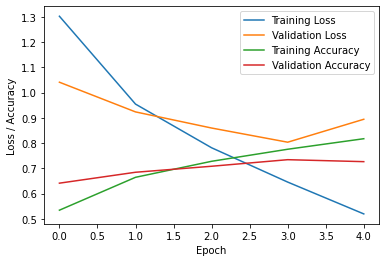

In [156]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()